## 예제
1. csv 폴더에 있는 파일 4개 로드 (tran_1, tran_2, tran_d_1, tran_d_2)
2. tran_1, tran_2 단순하게 행을 추가 결합 (tran)
3. tran_d_1, tran_d_2, 단순하게 행을 추가 결합 (tran_d)
4. 2번, 3번 과정에서 결합한 데이터 프레임을 특정 조건에 맞춰서 left(tran)를 기준으로 열 결합(transact

In [120]:
import pandas as pd

tran_1 = pd.read_csv('../CSV/tran_1.csv')
tran_2 = pd.read_csv('../CSV/tran_2.csv')
tran_d_1 = pd.read_csv('../CSV/tran_d_1.csv')
tran_d_2 = pd.read_csv('../CSV/tran_d_2.csv')


In [121]:
tran = pd.concat([tran_1,tran_2], axis=0)

In [122]:
tran

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
1781,T0000006894,180000,2019-07-31 21:20:44,HI400734
1782,T0000006895,85000,2019-07-31 21:52:48,AS339451
1783,T0000006896,100000,2019-07-31 23:35:25,OA027325
1784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [123]:
tran_d = pd.concat([tran_d_1,tran_d_2], axis=0)

In [124]:
tran_d

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
2139,7139,T0000006894,S004,1
2140,7140,T0000006895,S002,1
2141,7141,T0000006896,S001,2
2142,7142,T0000006897,S002,1


In [125]:
transaction=pd.merge(tran, tran_d, on='transaction_id', how='left')

In [126]:
transaction

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


## 데이터 결합2
1. 파일 로드 (customer_master, item_master)
2. 1번 과정에서 불러온 2개의 데이터프레임을 transaction 조건에 맞게 조인 결합
3. 결합이 된 데이터 프레임에서 quantity 컬럼과 item_price 컬럼을 가지고 total_price 새로운 컬럼 추가 (quantity * item_price)
4. payment_date 컬럼을 시계열 데이터로 변경

In [127]:
customer_master = pd.read_csv('../CSV/customer_master.csv')
item_master = pd.read_csv('../CSV/item_master.csv')

In [128]:
customer_master.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [129]:
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [130]:
customer = pd.merge(transaction, customer_master, on='customer_id', how='left')

In [131]:
customer

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
item = pd.merge(customer,item_master, on='item_id', how='left')

In [133]:
item

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000


In [134]:
item['total_price']=item['quantity']*item['item_price']

In [135]:
item

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000,180000
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000,85000


In [136]:
item['payment_date'] = pd.to_datetime(item['payment_date'], format='%Y-%m-%d %H:%M:%S')

In [137]:
item

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000,180000
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000,85000


In [138]:
item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7144 entries, 0 to 7143
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7144 non-null   object        
 1   price           7144 non-null   int64         
 2   payment_date    7144 non-null   datetime64[ns]
 3   customer_id     7144 non-null   object        
 4   detail_id       7144 non-null   int64         
 5   item_id         7144 non-null   object        
 6   quantity        7144 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   float64       
 14  item_name       7144 non-null   object        
 15  item

In [139]:
## 시계열 데이터에서 년도와 월 부분만 따로 추출-> payment_month 컬럼 생성
item['payment_month']=item['payment_date'].dt.strftime('%m')

## 그룹화 예제
1. payment_month를 기준으로 그룹화
2. total_price의 합계, price의 합계를 출력
3. 2개의 합계를 matplotlib을 이용하여 라인그래프 시각화 (subplot 이용)

In [140]:
item

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,02
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000,02
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000,02
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,02
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000,180000,07
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000,07
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000,07
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000,85000,07


In [141]:

## case1
group_data=item.groupby('payment_month').sum()[['total_price','price']]

## case2
#item.groupby('payment_month').sum().loc[:, ('price, total_price')]
## case3
#item.groupby('payment_month').sum().iloc[:, [0, 5]]

C:\Users\ezen\AppData\Local\Temp\ipykernel_9728\682835333.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data=item.groupby('payment_month').sum()[['total_price','price']]


In [142]:
!pip install matplotlib

import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


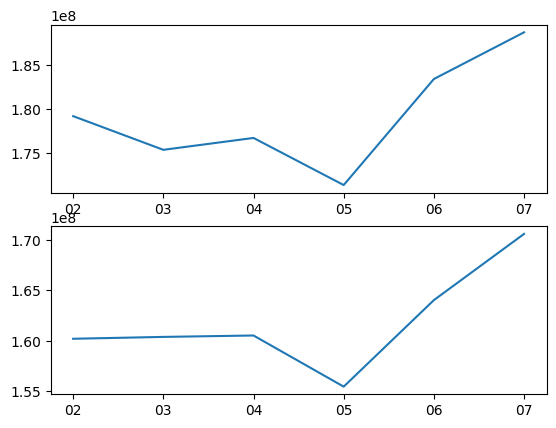

In [143]:
## 라인 그래프 시각화
## subplot으로 그래프 2개 생성


plt.subplot(2,1,1)
plt.plot(group_data['price'])
plt.subplot(2,1,2)
plt.plot(group_data['total_price'])
plt.show()



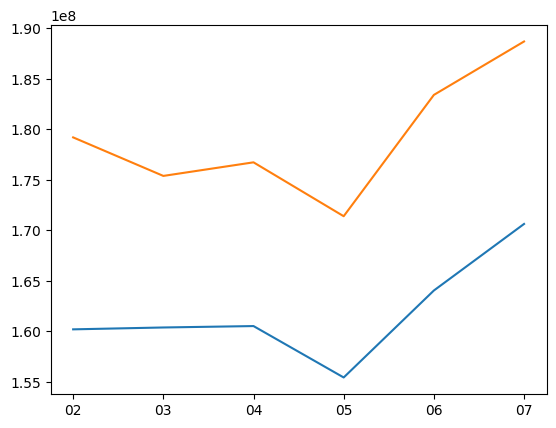

In [144]:
plt.plot(group_data)
plt.show()


## apply()
1. 시리즈 형태의 데이터에서 각 항목들을 하났기 함수에 대입하여 결과값을 시리즈 형태로 리턴 함수
2. apply(일반함수),  apply(lambda함수)


## 예제3
1. total_df=> item (맨 마지막 도출 데이터프레임)에서 gender컬럼의 값들의 데이터를 확인
2. m,f, Nan 데이터가 있는 것을 확인
3. M은 남자, F는 여자, Nan 은 무응답으로 데이터를 변경 (apply 사용)

In [145]:
item

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,02
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,XXXXX,C01,M,2018-06-02 00:00:00,2019-01-31 00:00:00,CA2,1.0,PC-A,50000,50000,02
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0.0,PC-C,120000,120000,02
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0.0,PC-E,210000,210000,02
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2,XXXXX,C03,M,2018-04-09 00:00:00,2018-11-30 00:00:00,CA3,1.0,PC-B,85000,170000,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-D,180000,180000,07
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1,XXXXX,C01,M,2016-07-01 00:00:00,NaN,CA2,0.0,PC-B,85000,85000,07
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2,XX,C03,F,2018-12-02 00:00:00,NaN,CA3,0.0,PC-A,50000,100000,07
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PC-B,85000,85000,07


In [146]:
print(item['gender'].values)

['M' 'M' 'F' ... 'F' nan 'M']


In [147]:
item['gender']

0         M
1         M
2         F
3         M
4         M
       ... 
7139    NaN
7140      M
7141      F
7142    NaN
7143      M
Name: gender, Length: 7144, dtype: object

예제 풀이

In [159]:
## 결측치 확인
item['gender'].isna().sum()

1075

In [162]:
## 데이터의 분포
item['gender'].unique()
#item['gender'].value_counts()

array(['M', 'F', nan], dtype=object)

In [166]:
## gender의 데이터 값 변경

## case1(apply와 일반함수)
def change(x):
    #print(x)
    #return x
    if x =='M':
        # result ='남자'
        return '남자'
    elif x=='F':
        # result ='여자'
        return '여자'
    else:
        # result = '무응답'
        return '무응답'
    # return result


    item['gender'].apply(change)


0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object

In [167]:
## case2 (apply와 람다함수)
item['gender'].apply(
    lambda x :'여자' if (x == 'F') else (
    '남자' if (x=='M') else '무응답'
    )
)


0        남자
1        남자
2        여자
3        남자
4        남자
       ... 
7139    무응답
7140     남자
7141     여자
7142    무응답
7143     남자
Name: gender, Length: 7144, dtype: object